In [1]:
import numpy as np
import pandas as pd

## Load dataset

Dataset source: <https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset>


In [2]:
df = pd.read_csv('./data/spam.csv', encoding='latin-1')

display(df.shape)
display(df.head())
df.info()

(5572, 5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Clean data


### Transform data


In [3]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1': 'target', 'v2': 'text'})

display(df.shape)
display(df.head())

(5572, 2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = encoder.fit_transform(df['target'])

display(encoder.classes_)
display(target)

array(['ham', 'spam'], dtype=object)

array([0, 0, 1, ..., 0, 0, 0])

In [5]:
df['target'] = target
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Check for null values


In [6]:
display(df.isnull().sum())

if df.isnull().to_numpy().any():
    df = df.dropna()
    display('Removed rows with missing values.')
    display(df.isnull().sum())

target    0
text      0
dtype: int64

### Remove duplicates


In [7]:
display(df.duplicated().sum())

if df.duplicated().any():
    df = df.drop_duplicates()
    display('Removed duplicated rows.')
    display(df.duplicated().sum())

403

'Removed duplicated rows.'

0

## Perform EDA (Exploratory Data Analysis)


In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


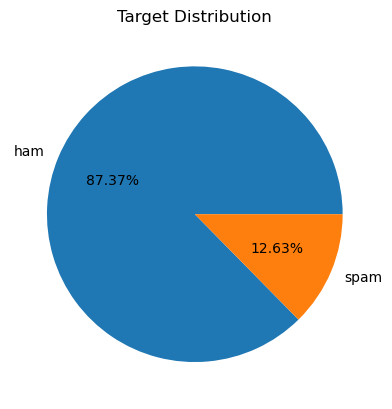

In [9]:
import matplotlib.pyplot as plt

plt.pie(
    df['target'].value_counts(),
    labels=encoder.classes_.tolist(),
    autopct='%0.2f%%'
)
plt.title('Target Distribution')
plt.show()

In [10]:
%pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.5/278.5 kB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import nltk

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adriancielniak/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
df['characters_count'] = df['text'].apply(len)
df['words_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['sentences_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,characters_count,words_count,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [14]:
hams = df[df['target'] == 0]
spams = df[df['target'] == 1]

display('All')
display(df[['characters_count', 'words_count', 'sentences_count']].describe())

display('Hams')
display(hams[['characters_count', 'words_count', 'sentences_count']].describe())

display('Spams')
display(spams[['characters_count', 'words_count', 'sentences_count']].describe())

'All'

,characters_count,words_count,sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


'Hams'

,characters_count,words_count,sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


'Spams'

,characters_count,words_count,sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


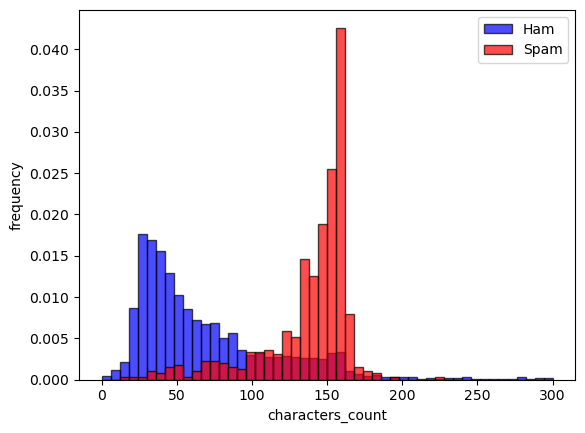

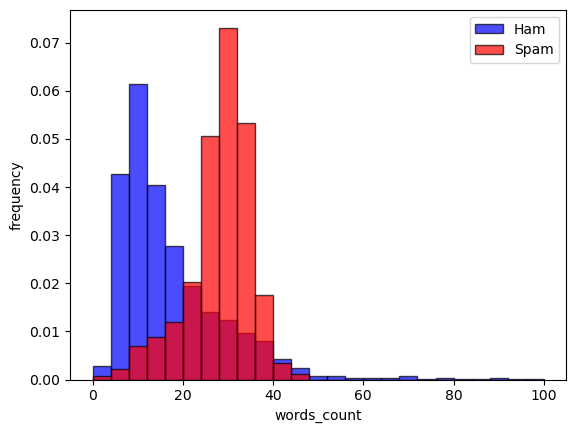

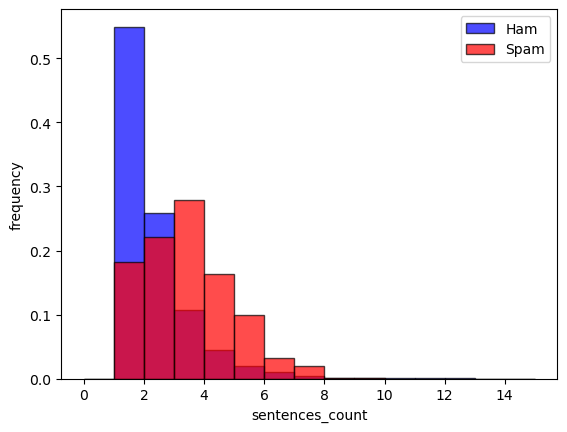

In [15]:
cols = ['characters_count', 'words_count', 'sentences_count']
bins = [50, 25, 15]
xlims = [(0, 300), (0, 100), (0, 15)]

for col, bin, xlim in zip(cols, bins, xlims):
    plt.hist(
        hams[col],
        bins=bin,
        alpha=0.7,
        label='Ham',
        color='blue',
        density=True,
        edgecolor='black',
        range=xlim
    )
    plt.hist(
        spams[col],
        bins=bin,
        alpha=0.7,
        label='Spam',
        color='red',
        density=True,
        edgecolor='black',
        range=xlim
    )
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.legend()
    plt.show()

In [16]:
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

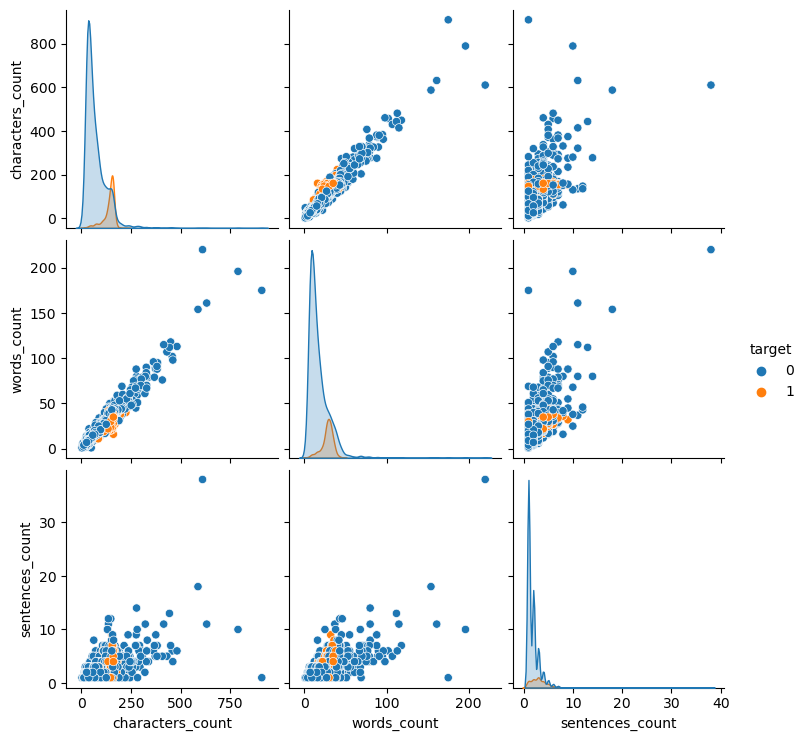

In [17]:
sns.pairplot(df, hue='target')
plt.show()

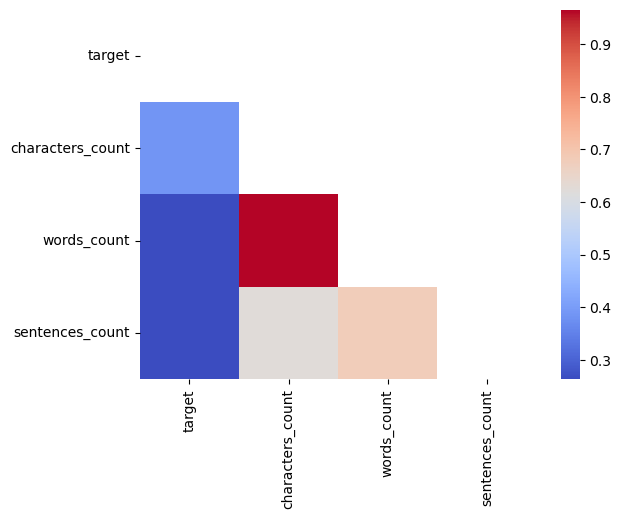

In [18]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    cmap='coolwarm',
    mask=mask,
    # vmin=-1,
    # vmax=1,
)
plt.show()

# Data preprocessing


In [19]:
import string
from nltk.stem.porter import PorterStemmer

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adriancielniak/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stemmer = PorterStemmer()

### Text transformation

1. Lowercase
1. Tokenize
1. Remove special characters
1. Remove stopwords and punctuation
1. Stemming


In [22]:
def text_transform(text: str) -> str:
    result = text.lower()
    result = nltk.word_tokenize(result)

    temp = []
    for word in result:
        if word.isalnum():
            temp.append(word)
    result = temp

    temp = []
    for word in result:
        if word not in nltk.corpus.stopwords.words('english') and word not in string.punctuation:
            temp.append(word)
    result = temp

    temp = []
    for word in result:
        temp.append(stemmer.stem(word))
    result = temp

    return " ".join(result)

In [23]:
text = df['text'][5]
display(text)
display(text_transform(text))

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [24]:
df['text_transformed'] = df['text'].apply(text_transform)
df.head()

,target,text,characters_count,words_count,sentences_count,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


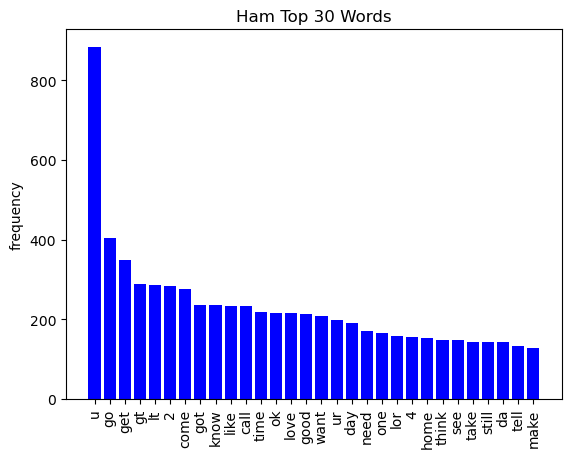

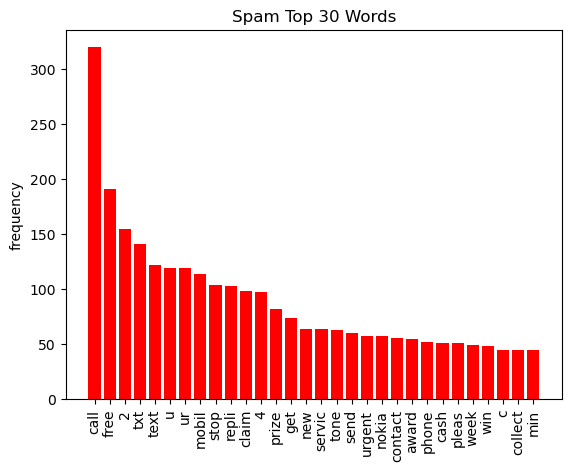

In [25]:
from collections import Counter

ham_corpus = df[df['target'] == 0]['text_transformed'].str.split(
    expand=True
).stack()
spam_corpus = df[df['target'] == 1]['text_transformed'].str.split(
    expand=True
).stack()

n = 30
ham_counter = Counter(ham_corpus)
spam_counter = Counter(spam_corpus)

plt.bar(
    *zip(*ham_counter.most_common(n)),
    color='blue'
)
plt.xticks(rotation=90)
plt.ylabel('frequency')
plt.title(f'Ham Top {n} Words')
plt.show()

plt.bar(
    *zip(*spam_counter.most_common(n)),
    color='red'
)
plt.xticks(rotation=90)
plt.ylabel('frequency')
plt.title(f'Spam Top {n} Words')
plt.show()

## Data Augmentation

In [60]:
import random
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adriancielniak/nltk_data...


True

#### Synonim Replecement

In [62]:
def synonym_replacement(words, n):
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in nltk.corpus.stopwords.words('english')]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n: 
            break

    return new_words

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

#### Random words inserting

In [63]:
def random_insertion(words, n):
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)

#### Function to randomly swap words

In [64]:
def random_swap(words, n):
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words

def swap_word(new_words):
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        if counter > 3:
            return new_words
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
    return new_words


## Model building


In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text_transformed'],
    df['target'],
    test_size=0.2,
    random_state=42
)

### CountVectorizer vs TfidfVectorizer

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

Source: <https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket/>


In [28]:
# cv = CountVectorizer(max_features=2000)
# cv.fit(X_train)
# vocab = cv.vocabulary_

tfidf = TfidfVectorizer(max_features=2000)
tfidf.fit(X_train)
vocab = tfidf.vocabulary_

display(vocab)

{'exact': 629,
 'intent': 901,
 'one': 1257,
 'ok': 1250,
 'next': 1202,
 'time': 1782,
 'free': 709,
 'video': 1872,
 'camera': 368,
 'phone': 1329,
 'half': 784,
 'price': 1407,
 'line': 1009,
 'rental': 1483,
 '12': 15,
 'mth': 1159,
 '500': 50,
 'ntwk': 1228,
 'min': 1105,
 '100': 11,
 'txt': 1829,
 'call': 360,
 'mobileupd8': 1125,
 'tick': 1778,
 'could': 468,
 'die': 536,
 'know': 963,
 'pout': 1386,
 'stomp': 1680,
 'feet': 667,
 'need': 1191,
 'tone': 1794,
 'club': 429,
 'sub': 1695,
 'expir': 641,
 'repli': 1485,
 'mono': 1137,
 'poli': 1366,
 'weekli': 1914,
 '150p': 19,
 'per': 1318,
 'week': 1912,
 'stop': 1681,
 'msg': 1156,
 'pleas': 1352,
 'text': 1752,
 'anymor': 162,
 'noth': 1224,
 'els': 599,
 'say': 1537,
 'pl': 1345,
 'find': 678,
 'aunt': 220,
 'bruce': 328,
 'amp': 147,
 'mom': 1131,
 'car': 376,
 'ca': 351,
 'park': 1301,
 'long': 1028,
 'stori': 1683,
 'miss': 1112,
 'allah': 132,
 'tell': 1746,
 'claim': 421,
 'prize': 1411,
 'enter': 610,
 'ur': 1853,
 'mob

In [29]:
# X_train = cv.transform(X_train).toarray() # type: ignore
# X_test = cv.transform(X_test).toarray() # type: ignore

X_train = tfidf.transform(X_train).toarray()   # type: ignore
X_test = tfidf.transform(X_test).toarray()  # type: ignore

### Scaling?

With TfidfVectorizer scaling isn't needed.

Source: <https://stackoverflow.com/a/36678046/12197778>


In [30]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)

In [31]:
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

### Scores

- $TP$ - True positive (spam classified as spam)
- $TN$ - True negative (ham classified as ham)
- $FP$ - False positive (ham classified as spam)
- $FN$ - False negative (spam classified as ham)

### Metrics

- Accuracy = $(TP + TN) / (TP + TN + FP + FN)$
- Precision = $TP / (TP + FP)$
  - How many predicted positives are actually positive
- Recall = $TP / (TP + FN)$
  - How many actual positives were detected

### Confusion matrix

|                     | Predicted Negative | Predicted Positive |
| ------------------- | ------------------ | ------------------ |
| **Actual Negative** | TN                 | FP                 |
| **Actual Positive** | FN                 | TP                 |


In [32]:
def train_clf(clf, X_train, y_train):
    clf.fit(X_train, y_train)


def calc_scores(clf, X_test, y_test):
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return acc, prec, rec, cm


def print_scores(acc, prec, rec, cm):
    output = f"Accuracy: {acc}\n"
    output += f"Precision: {prec}\n"
    output += f"Recall: {rec}\n"
    output += "Confusion Matrix:\n"
    output += f"{cm}\n"

    print(output)


def create_perf_df(scores_dict):
    perf_df = pd.DataFrame(
        scores_dict,
        index=[
            'accuracy',
            'precision',
            'recall',
            'confusion_matrix'
        ]
    )
    perf_df = perf_df.drop('confusion_matrix')
    perf_df = perf_df.sort_values(by='precision', axis=1, ascending=False)
    perf_df = perf_df.T
    return perf_df

In [33]:
nb_clfs = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB()
}


nb_scores_dict = {}
for name, clf in nb_clfs.items():
    train_clf(clf, X_train, y_train)
    scores = calc_scores(clf, X_test, y_test)
    nb_scores_dict[name] = scores

In [34]:
nb_perf_df = create_perf_df(nb_scores_dict)
display(nb_perf_df)

,accuracy,precision,recall
Multinomial Naive Bayes,0.973888,0.983607,0.827586
Bernoulli Naive Bayes,0.974855,0.954198,0.862069
Gaussian Naive Bayes,0.823985,0.436426,0.875862


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [36]:
clfs = {
    'LR': LogisticRegression(solver='liblinear', penalty='l1'),
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'MNB': MultinomialNB(),
    'DTC': DecisionTreeClassifier(max_depth=5),
    'KNC': KNeighborsClassifier(),
    'RFC': RandomForestClassifier(n_estimators=50, random_state=42),
    'ABC': AdaBoostClassifier(n_estimators=50, random_state=42),
    'BC': BaggingClassifier(n_estimators=50, random_state=42),
    'ETC': ExtraTreesClassifier(n_estimators=50, random_state=42),
    'GBC': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'XGBC': XGBClassifier(n_estimators=50, random_state=42)
}

In [37]:
clfs_scores_dict = {}

for name, clf in clfs.items():
    train_clf(clf, X_train, y_train)
    scores = calc_scores(clf, X_test, y_test)
    clfs_scores_dict[name] = scores

In [38]:
clfs_perf_df = create_perf_df(clfs_scores_dict)
display(clfs_perf_df)

,accuracy,precision,recall
KNC,0.910058,1.0,0.358621
RFC,0.970986,0.991453,0.8
MNB,0.973888,0.983607,0.827586
ETC,0.976789,0.961832,0.868966
SVC,0.978723,0.955556,0.889655
GBC,0.945841,0.949495,0.648276
XGBC,0.965184,0.936,0.806897
BC,0.964217,0.897059,0.841379
LR,0.954545,0.876923,0.786207
ABC,0.951644,0.868217,0.772414


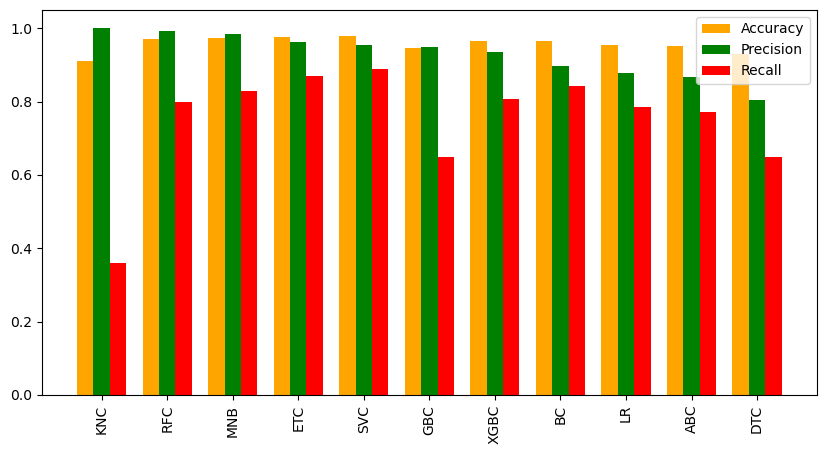

In [39]:
bar_width = 0.25

r1 = np.arange(len(clfs_perf_df)) - bar_width
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 5))
plt.bar(
    r1,
    clfs_perf_df['accuracy'],
    label='Accuracy',
    width=bar_width,
    color='orange'
)
plt.bar(
    r2,
    clfs_perf_df['precision'],
    label='Precision',
    width=bar_width,
    color='green'
)
plt.bar(
    r3,
    clfs_perf_df['recall'],
    label='Recall',
    width=bar_width,
    color='red'
)
plt.xticks(
    rotation=90,
    ticks=range(len(clfs_perf_df)),
    labels=clfs_perf_df.index  # type: ignore
)
plt.legend()
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

In [213]:
# from sklearn.base import TransformerMixin

# class ToArrayTransformer(TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X.toarray()

# scalers_2 = [
#     None,
#     MinMaxScaler()
# ]

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    df['text_transformed'],
    df['target'],
    test_size=0.2,
    random_state=42
)

clfs_2 = [
    clfs['MNB'],
    clfs['ETC'],
    clfs['RFC'],
    clfs['SVC'],
    clfs['XGBC'],
]

param_grid_2 = [
    {
        'vectorizer': [TfidfVectorizer(max_features=1000)],
        'classifier': clfs_2
    },
    {
        'vectorizer': [TfidfVectorizer(max_features=2000)],
        'classifier': clfs_2
    },
    {
        'vectorizer': [TfidfVectorizer(max_features=3000)],
        'classifier':  clfs_2
    }
]

pipeline_2 = Pipeline([
    ('vectorizer', None),
    ('classifier', None)
])

grid_search_2 = GridSearchCV(
    pipeline_2,
    param_grid_2,
    cv=5,
    scoring='precision'
)
grid_search_2.fit(X_train_2, y_train_2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', None),
                                       ('classifier', None)]),
             param_grid=[{'classifier': [MultinomialNB(),
                                         ExtraTreesClassifier(n_estimators=50,
                                                              random_state=42),
                                         RandomForestClassifier(n_estimators=50,
                                                                random_state=42),
                                         SVC(gamma=1.0, kernel='sigmoid'),
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=Non...
                                                       learning_rate=None,
                                                       max_bin=None,
                                                       max_cat_threshold=None,
                                                       max_cat_to_onehot=None,
                                                       max_delta_step=None,
                                                       max_depth=None,
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=50,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=42, ...)],
                          'vectorizer': [TfidfVectorizer(max_features=3000)]}],
             scoring='precision')

In [42]:
results_2 = pd.DataFrame(grid_search_2.cv_results_)
results_2 = results_2.sort_values('rank_test_score')
results_short_2 = results_2.drop(
    columns=[
        'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params'
    ]
)
display(results_short_2)

,param_classifier,param_vectorizer,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,MultinomialNB(),TfidfVectorizer(max_features=2000),0.988235,0.986486,1.000000,1.000000,1.000000,0.994944,0.006217,1
10,MultinomialNB(),TfidfVectorizer(max_features=3000),0.987013,0.985507,1.000000,1.000000,1.000000,0.994504,0.006748,2
12,"(DecisionTreeClassifier(max_features='sqrt', r...",TfidfVectorizer(max_features=3000),0.988506,0.974026,1.000000,1.000000,0.986111,0.989729,0.009718,3
7,"(DecisionTreeClassifier(max_features='sqrt', r...",TfidfVectorizer(max_features=2000),0.988235,0.987805,1.000000,0.987500,0.972603,0.987229,0.008700,4
0,MultinomialNB(),TfidfVectorizer(max_features=1000),0.988506,0.961538,0.978723,0.988372,1.000000,0.983428,0.012854,5
6,"(ExtraTreeClassifier(random_state=1608637542),...",TfidfVectorizer(max_features=2000),0.977528,0.963415,0.977273,1.000000,0.946667,0.972976,0.017624,6
8,"SVC(gamma=1.0, kernel='sigmoid')",TfidfVectorizer(max_features=2000),0.968421,0.975610,0.978495,0.955556,0.985714,0.972759,0.010234,7
2,"(DecisionTreeClassifier(max_features='sqrt', r...",TfidfVectorizer(max_features=1000),0.943820,0.987952,0.988636,0.975610,0.960000,0.971204,0.017200,8
11,"(ExtraTreeClassifier(random_state=1608637542),...",TfidfVectorizer(max_features=3000),0.988636,0.952941,1.000000,0.976744,0.936709,0.971006,0.023182,9
13,"SVC(gamma=1.0, kernel='sigmoid')",TfidfVectorizer(max_features=3000),0.958333,0.976190,0.989130,0.956522,0.973333,0.970702,0.012089,10


In [43]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    df['text_transformed'],
    df['target'],
    test_size=0.2,
    random_state=42
)

tfidf_3 = TfidfVectorizer(max_features=2000)
tfidf_3.fit(X_train_3)

X_train_3 = tfidf_3.transform(X_train_3)
X_test_3 = tfidf_3.transform(X_test_3)

In [44]:
clfs_3 = {
    'MNB': clfs['MNB'],
    'ETC': clfs['ETC'],
    'RFC': clfs['RFC'],
}

clfs_3_scores_dict = {}

for name, clf in clfs_3.items():
    train_clf(clf, X_train_3, y_train_3)
    scores = calc_scores(clf, X_test_3, y_test_3)
    clfs_3_scores_dict[name] = scores

In [45]:
clfs_3_perf_df = create_perf_df(clfs_3_scores_dict)
display(clfs_3_perf_df)

,accuracy,precision,recall
RFC,0.970986,0.991453,0.8
MNB,0.973888,0.983607,0.827586
ETC,0.976789,0.961832,0.868966


In [46]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    np.column_stack((
        df['text_transformed'],
        df['characters_count'],
    )),
    df['target'],
    test_size=0.2,
    random_state=42
)

tfidf_4 = TfidfVectorizer(max_features=2000)
tfidf_4.fit(X_train_4[:, 0])

X_train_4_a = tfidf_4.transform(X_train_4[:, 0]).toarray()  # type: ignore
X_test_4_a = tfidf_4.transform(X_test_4[:, 0]).toarray()  # type: ignore
X_train_4_b = X_train_4[:, 1:2].reshape(-1, 1)
X_test_4_b = X_test_4[:, 1:2].reshape(-1, 1)

X_train_4 = np.concatenate((X_train_4_a, X_train_4_b), axis=1)
X_test_4 = np.concatenate((X_test_4_a, X_test_4_b), axis=1)

display(X_train_4[:5])

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 30],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 25],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 34],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 145],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 111]], dtype=object)

In [47]:
clfs_4 = {
    'MNB': clfs['MNB'],
    'ETC': clfs['ETC'],
    'RFC': clfs['RFC'],
}

clfs_4_scores_dict = {}

for name, clf in clfs_4.items():
    train_clf(clf, X_train_4, y_train_4)
    scores = calc_scores(clf, X_test_4, y_test_4)
    clfs_4_scores_dict[name] = scores

In [48]:
clfs_4_perf_df = create_perf_df(clfs_4_scores_dict)
display(clfs_4_perf_df)

,accuracy,precision,recall
RFC,0.972921,0.983471,0.82069
MNB,0.964217,0.982143,0.758621
ETC,0.979691,0.962687,0.889655


## Ensemble


In [49]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

In [50]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    df['text_transformed'],
    df['target'],
    test_size=0.2,
    random_state=42
)

tfidf_final = TfidfVectorizer(max_features=3000)
tfidf_final.fit(X_train_final)

X_train_final = tfidf_final.transform(X_train_final)
X_test_final = tfidf_final.transform(X_test_final)

### Individual models adjusting


In [51]:
mnb = MultinomialNB()
param_grid_mnb = {
    'alpha': np.linspace(0.7, 1.0, num=7),
}

grid_search_mnb = GridSearchCV(
    mnb,
    param_grid_mnb,
    cv=5,
    scoring='precision',
)
grid_search_mnb.fit(X_train_final, y_train_final)

results_mnb = pd.DataFrame(grid_search_mnb.cv_results_)
results_mnb = results_mnb.sort_values('rank_test_score')
display(results_mnb)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.001160,0.000171,0.000993,0.000104,0.75,{'alpha': 0.75},0.988095,0.987013,1.000000,1.0,1.0,0.995022,0.006107,1
2,0.000958,0.000042,0.000930,0.000165,0.8,{'alpha': 0.7999999999999999},0.987805,0.987013,1.000000,1.0,1.0,0.994964,0.006173,2
3,0.000941,0.000025,0.000843,0.000011,0.85,{'alpha': 0.85},0.987805,0.986486,1.000000,1.0,1.0,0.994858,0.006311,3
4,0.001121,0.000407,0.000840,0.000111,0.9,{'alpha': 0.9},0.987500,0.986301,1.000000,1.0,1.0,0.994760,0.006429,4
5,0.000989,0.000108,0.000855,0.000041,0.95,{'alpha': 0.95},0.987013,0.986301,1.000000,1.0,1.0,0.994663,0.006540,5
6,0.001031,0.000240,0.000803,0.000025,1.0,{'alpha': 1.0},0.987013,0.986301,1.000000,1.0,1.0,0.994663,0.006540,5
0,0.001463,0.000176,0.001176,0.000118,0.7,{'alpha': 0.7},0.988235,0.987179,0.988372,1.0,1.0,0.992757,0.005928,7


In [52]:
etc = ExtraTreesClassifier()
param_grid_etc = {
    'n_estimators': [50, 100, 150, 200],
}

grid_search_etc = GridSearchCV(
    etc,
    param_grid_etc,
    cv=5,
    scoring='precision',
)
grid_search_etc.fit(X_train_final, y_train_final)

results_etc = pd.DataFrame(grid_search_etc.cv_results_)
results_etc = results_etc.sort_values('rank_test_score')
display(results_etc)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.810284,0.043131,0.017241,0.000402,50,{'n_estimators': 50},1.000000,0.988095,1.0,1.000000,0.963855,0.990390,0.014046,1
3,3.296121,0.186541,0.064794,0.001190,200,{'n_estimators': 200},0.976190,0.954023,1.0,1.000000,0.952941,0.976631,0.020807,2
2,2.453120,0.149848,0.048610,0.001182,150,{'n_estimators': 150},0.975610,0.954545,1.0,0.988372,0.953488,0.974403,0.018350,3
1,1.604826,0.073024,0.033083,0.000705,100,{'n_estimators': 100},0.975904,0.954023,1.0,0.988235,0.941176,0.971868,0.021615,4


In [53]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
param_grid_rfc = {
    'n_estimators': [50, 100, 150, 200],
}

grid_search_rfc = GridSearchCV(
    rfc,
    param_grid_rfc,
    cv=5,
    scoring='precision',
)
grid_search_rfc.fit(X_train_final, y_train_final)

results_rfc = pd.DataFrame(grid_search_rfc.cv_results_)
results_rfc = results_rfc.sort_values('rank_test_score')
display(results_rfc)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,1.906767,0.101371,0.044120,0.002656,200,{'n_estimators': 200},0.987342,0.974684,1.0,1.000,1.000000,0.992405,0.010127,1
2,1.449166,0.075255,0.033193,0.001974,150,{'n_estimators': 150},0.987342,0.974359,1.0,1.000,1.000000,0.992340,0.010240,2
1,0.927128,0.049125,0.022503,0.001381,100,{'n_estimators': 100},0.987179,0.974026,1.0,1.000,0.987654,0.989772,0.009679,3
0,0.463426,0.025810,0.011976,0.000576,50,{'n_estimators': 50},0.987013,0.973684,1.0,0.975,0.987654,0.984670,0.009629,4


In [54]:
clfs_final = {
    'MNB': MultinomialNB(alpha=0.75),
    'ETC': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'RFC': RandomForestClassifier(n_estimators=150, random_state=42)
}

In [55]:
clf_stack = StackingClassifier(
    estimators=[*clfs_final.items()],
    final_estimator=LogisticRegression()
)

train_clf(clf_stack, X_train_final, y_train_final)
scores = calc_scores(clf_stack, X_test_final, y_test_final)

print('Voting Classifier')
print_scores(*scores)

Voting Classifier
Accuracy: 0.9835589941972921
Precision: 0.9848484848484849
Recall: 0.896551724137931
Confusion Matrix:
[[887   2]
 [ 15 130]]



In [56]:
clf_voting = VotingClassifier(
    estimators=[*clfs_final.items()],
    voting='soft'
)

train_clf(clf_voting, X_train_final, y_train_final)
scores = calc_scores(clf_voting, X_test_final, y_test_final)

print('Voting Classifier')
print_scores(*scores)

Voting Classifier
Accuracy: 0.9796905222437138
Precision: 1.0
Recall: 0.8551724137931035
Confusion Matrix:
[[889   0]
 [ 21 124]]



In [57]:
import pickle

pickle.dump(tfidf_final, open('./dist/vectorizer.pkl', 'wb'))
pickle.dump(clf_voting, open('./dist/classifier.pkl', 'wb'))